In [12]:
import os
import re
from docx import Document
import PyPDF2
import win32com.client
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
## Differentiate files:

file_path   = r"C:\Users\mpapu\Downloads\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes-20211103T133301Z-001.zip (Unzipped Files)\Resumes"
doc_file    = []
pdf_file    = []
docx_file   = []

for folder in os.listdir(file_path):
    folder_path = file_path+'\\'+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
        elif file.endswith('.docx'):
            docx_file.append(file)
        elif file.endswith('.pdf'):
            pdf_file.append(file)
        else:
            print('Unsupported file format!')

In [28]:
print(".doc file length : ", len(doc_file))
print(".docx file length : ", len(docx_file))
print(".pdf file length : ", len(pdf_file))

.doc file length :  26
.docx file length :  52
.pdf file length :  1


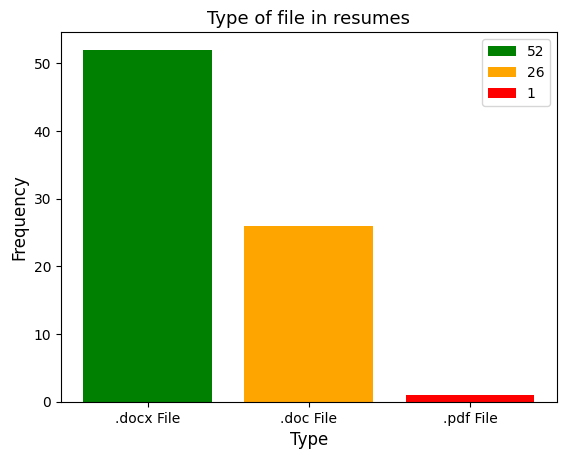

In [30]:
## visualizing file type frequency:
x = ['.docx File','.doc File','.pdf File']
y = [len(docx_file),len(doc_file),len(pdf_file)]
color = ['g', 'orange', 'r']
lb = [len(docx_file),len(doc_file),len(pdf_file)]
plt.bar(x, y, color=color, label=lb)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.title('Type of file in resumes', fontsize=13)
plt.show()

## Preparing cleaned resume dataset based on job role applying nlp:

In [34]:
## Creating function for extract data with cleaned text:
nlp = spacy.load('en_core_web_sm')

## function for data cleaning:
def clean_data(text):
    text1 = ' '.join(re.findall('\w+', text))
    doc = nlp(text1)
    clean_text = [word.lemma_ for word in doc if not word.is_stop and not word.is_punct and not word.is_bracket and not word.is_currency and not word.is_space]
    clean_text = ' '.join(clean_text)
    return clean_text

## function for text extraction:
def read_pdf(file_path):  ##for .pdf file
    text = ""
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text()
    text = clean_data(text)
    return text

def read_docx(file_path):   ##for .docx file
    doc = Document(file_path)
    text = " ".join([para.text for para in doc.paragraphs])
    text = clean_data(text)
    return text

def read_doc(file_path):  ##for .doc file
    word = win32com.client.Dispatch("Word.Application")
    word.Visible = False  # Don't show the Word application
    doc = word.Documents.Open(file_path)
    text = doc.Content.Text
    doc.Close()
    word.Quit()
    text = clean_data(text)
    return text

## combineing above functions
def extract_text(file_path):
    if file_path.endswith('.pdf'):
        return read_pdf(file_path)
    elif file_path.endswith('.docx'):
        return read_docx(file_path)
    elif file_path.endswith('.doc'):
        return read_doc(file_path)
    else:
        raise ValueError("Unsupported file format!")

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\mpapu\AppData\Local\Temp\ipykernel_12168\1832650488.py:6: SyntaxWarning: invalid escape sequence '\w'
  text1 = ' '.join(re.findall('\w+', text))


In [62]:
df = pd.DataFrame(columns=['role', 'cleaned_data', 'file_name'])
df

,role,cleaned_data,file_name


In [44]:
file_path

'C:\\Users\\mpapu\\Downloads\\Resumes-20211103T133301Z-001.zip (Unzipped Files)\\Resumes-20211103T133301Z-001.zip (Unzipped Files)\\Resumes'

In [50]:
## Adding cleaned data to dataset:
roles = []
cln_data = []
file_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+'\\'+folder
    for file in os.listdir(folder_path):
        if 'peoplesoft' in folder.lower():
            roles.append('peoplesoft')
            file_name.append(file)
            cln_data.append(extract_text(folder_path+'\\'+file))
        elif 'workday' in folder.lower():
            roles.append('workday')
            file_name.append(file)
            cln_data.append(extract_text(folder_path+'\\'+file))
        elif 'react_dev' in folder.lower():
            roles.append('react_dev')
            file_name.append(file)
            cln_data.append(extract_text(folder_path+'\\'+file))
        elif 'sql' in folder.lower():
            roles.append('sql_dev')
            file_name.append(file)
            cln_data.append(extract_text(folder_path+'\\'+file))
        else:
            print('Other job role in ', file)

In [52]:
len(roles)

79

In [54]:
len(cln_data)

79

In [56]:
len(file_name)

79

In [64]:
df['role'] = roles
df['cleaned_data'] = cln_data
df['file_name'] = file_name

In [66]:
df.head()

,role,cleaned_data,file_name
0,peoplesoft,Anubhav Kumar Singh work globally competitive ...,Peoplesoft Admin_AnubhavSingh.docx
1,peoplesoft,profile Summary 7 year experience implement up...,Peoplesoft Admin_G Ananda Rayudu.doc
2,peoplesoft,PeopleSoft Database Administrator Gangareddy P...,Peoplesoft Admin_Gangareddy.doc
3,peoplesoft,murali experience Summary 6 year experience wo...,Peoplesoft Admin_Murali.docx
4,peoplesoft,Priyanka Ramadoss 61 46 MountPleasant Coonoor ...,Peoplesoft Admin_Priyanka Ramadoss.doc


In [68]:
## Creating csv file:
df.to_csv('resumes.csv', index=False)

In [70]:
## Reading csv :
df = pd.read_csv('resumes.csv')
df.head()

,role,cleaned_data,file_name
0,peoplesoft,Anubhav Kumar Singh work globally competitive ...,Peoplesoft Admin_AnubhavSingh.docx
1,peoplesoft,profile Summary 7 year experience implement up...,Peoplesoft Admin_G Ananda Rayudu.doc
2,peoplesoft,PeopleSoft Database Administrator Gangareddy P...,Peoplesoft Admin_Gangareddy.doc
3,peoplesoft,murali experience Summary 6 year experience wo...,Peoplesoft Admin_Murali.docx
4,peoplesoft,Priyanka Ramadoss 61 46 MountPleasant Coonoor ...,Peoplesoft Admin_Priyanka Ramadoss.doc


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   role          79 non-null     object
 1   cleaned_data  79 non-null     object
 2   file_name     79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [74]:
df.describe()

,role,cleaned_data,file_name
count,79,79,79
unique,4,77,79
top,react_dev,MAREEDU LOKESH BABU PROFESSIONAL overview 2 ye...,Peoplesoft Admin_AnubhavSingh.docx
freq,24,2,1


In [76]:
df['role'].value_counts()

role
react_dev     24
workday       21
peoplesoft    20
sql_dev       14
Name: count, dtype: int64

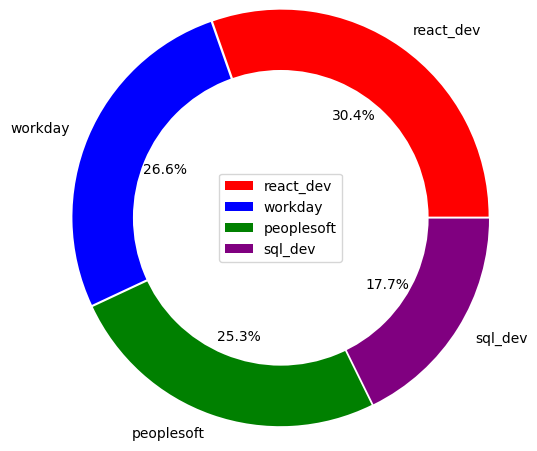

In [80]:
## Visualiing diffrent roles in percentage:
role_values = df.role.value_counts()
l = ['react_dev', 'workday', 'peoplesoft', 'sql_dev']
c = ['r', 'b', 'g', 'purple']
explode = [0.01, 0.01, 0.01, 0.01]

plt.pie(role_values, labels=l, autopct='%0.1f%%', explode=explode, colors=c, radius=1.4)
plt.pie([1], colors='white')

plt.legend(loc='center')
plt.show()

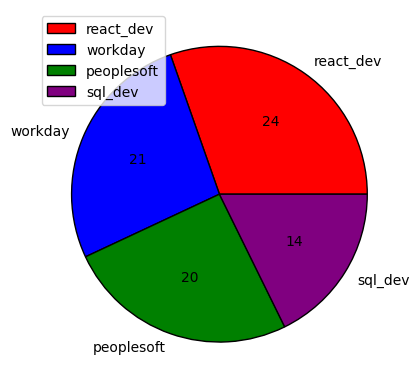

In [84]:
## Visualiing diffrent roles in number:
role_values = df.role.value_counts()
l = ['react_dev', 'workday', 'peoplesoft', 'sql_dev']
c = ['r', 'b', 'g', 'purple']
sizes = df.role.value_counts()

plt.pie(role_values, labels=l, colors=c, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100), wedgeprops={'edgecolor' : 'black'})
plt.legend(loc=2)
plt.show()

In [86]:
## Counting word in resumes:
df['word_count'] = df['cleaned_data'].apply(lambda x: len(str(x).split(" ")))
df[['file_name','word_count']].head()

,file_name,word_count
0,Peoplesoft Admin_AnubhavSingh.docx,764
1,Peoplesoft Admin_G Ananda Rayudu.doc,830
2,Peoplesoft Admin_Gangareddy.doc,649
3,Peoplesoft Admin_Murali.docx,429
4,Peoplesoft Admin_Priyanka Ramadoss.doc,532


## Checking null values:

In [89]:
df.isnull().sum()

role            0
cleaned_data    0
file_name       0
word_count      0
dtype: int64

In [91]:
df.duplicated().sum()

0

## Top 20 highest words in resume:

In [94]:
df[['file_name', 'word_count']].sort_values(by='word_count', ascending=False).head(20)

,file_name,word_count
6,Peoplesoft Admin_srinivasarao.doc,1861
10,PeopleSoft DBA_Vivekanand Sayana.docx,1551
8,Peoplesoft Admin_Vinod Akkala.doc,1492
9,PeopleSoft DBA_Ganesh Alladi.doc,1165
73,ShireeshKumar_Hexaware.doc,1113
13,Peoplesoft Finance_Rahul Ahuja.doc,1045
33,React JS Developer_AnjaniPriyadarshini.doc,934
11,Peoplesoft Finance_Arun Venu.doc,859
71,RahulM_Hexaware.docx,841
1,Peoplesoft Admin_G Ananda Rayudu.doc,830


## Most used words in resume:


In [97]:
## Using Countvectorizer:
count = CountVectorizer()

In [99]:
x = count.fit_transform(df['cleaned_data'])

In [101]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [103]:
x.shape

(79, 4099)

In [105]:
sum_rep = np.sum(x, axis=0)  ## sum of repeated words
sum_rep

matrix([[2, 1, 1, ..., 2, 1, 1]], dtype=int64)

In [107]:
count.vocabulary_.items()

dict_items([('anubhav', 352), ('kumar', 2063), ('singh', 3376), ('work', 4041), ('globally', 1621), ('competitive', 816), ('environment', 1344), ('challenge', 712), ('assignment', 420), ('shall', 3329), ('yield', 4084), ('twin', 3815), ('benefit', 535), ('job', 1996), ('satisfaction', 3229), ('steady', 3513), ('pace', 2604), ('professional', 2858), ('growth', 1669), ('experience', 1405), ('06', 13), ('2019', 79), ('current', 997), ('hcl', 1709), ('role', 3183), ('system', 3623), ('admin', 234), ('offshore', 2517), ('skills', 3389), ('shell', 3338), ('scripting', 3269), ('linux', 2135), ('peoplesoft', 2685), ('administration', 239), ('github', 1612), ('manage', 2207), ('hcm', 1710), ('fscm', 1553), ('production', 2853), ('support', 3593), ('instal', 1894), ('windows', 4025), ('os', 2576), ('involve', 1957), ('day', 1037), ('activity', 218), ('project', 2873), ('migration', 2312), ('database', 1027), ('refresh', 3050), ('change', 715), ('tax', 3655), ('update', 3853), ('etc', 1366), ('tr

In [109]:
## creating a dataframe of most repeated words:
uniq_words = []
rep_time = []

for i, j in count.vocabulary_.items():
    uniq_words.append(i)
    rep_time.append(sum_rep[0, j])

##dataframe:
df1 = pd.DataFrame({'words':uniq_words, 'rep_times':rep_time})

In [111]:
df1.shape

(4099, 2)

In [113]:
df1.sort_values(by='rep_times', ascending=False).head(20)

,words,rep_times
19,experience,619
57,application,472
32,peoplesoft,440
3,work,437
55,server,410
3454,workday,392
79,report,365
46,project,354
170,create,348
68,integration,311


## Visualizing top 20 most repeated words:

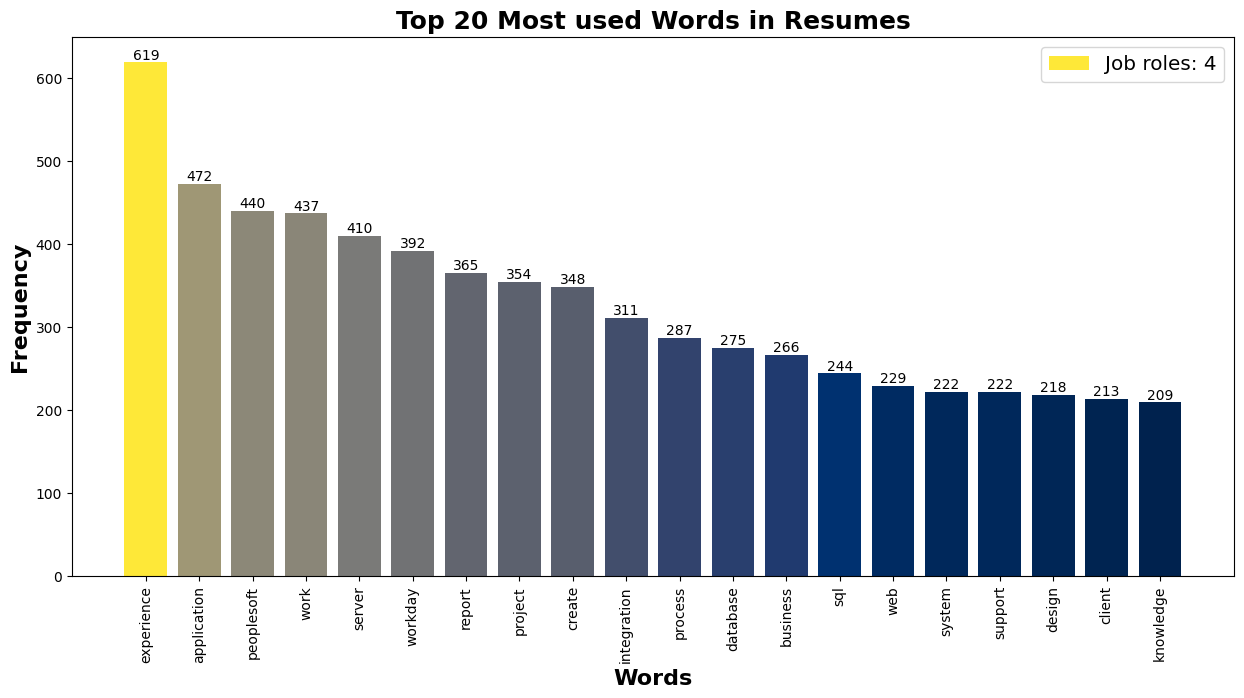

In [118]:
top_20 = df1.sort_values(by='rep_times', ascending=False).head(20)

plt.figure(figsize=(15, 7))
##color map:
norm = plt.Normalize(min(top_20['rep_times']), max(top_20['rep_times']))
colors = plt.cm.cividis(norm(top_20['rep_times']))

plt.bar(top_20['words'], top_20['rep_times'], color=colors, label='Job roles: {}'.format(len(df['role'].unique())))
plt.xlabel('Words', size=16,fontweight= 'bold')
plt.ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i, value in enumerate(top_20['rep_times']):    ## for respected values on top of bins
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()